# Convolutional Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
tf.test.gpu_device_name()

Using TensorFlow backend.


'/device:GPU:0'

In [3]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8281397248989959230, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 12642283982280324875
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 2193602895070735373
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11150726272
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 16194940168034713680
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [4]:
tf.__version__

'2.2.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [5]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('/content/drive/My Drive/capstone/dataset/train_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 15573 images belonging to 2 classes.


### Preprocessing the Test set

In [6]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('/content/drive/My Drive/capstone/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2710 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [0]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [0]:
# Conv 1
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

### Step 2 - Pooling

In [0]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [0]:
#normalization
cnn.add(tf.keras.layers.BatchNormalization(axis=-1))
# Dropout
cnn.add(tf.keras.layers.Dropout(0.5))

### Adding convolutional layers


In [0]:
# Conv 2
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))
cnn.add(tf.keras.layers.BatchNormalization(axis=-1))
cnn.add(tf.keras.layers.Dropout(0.5))

### Step 3 - Flattening

In [0]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [0]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [0]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [15]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 31, 31, 32)        128       
_________________________________________________________________
dropout (Dropout)            (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 14, 14, 32)        1

## Part 3 - Training the CNN

### Compiling the CNN

In [0]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [17]:
callbacks = []
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25, 
                  callbacks=callbacks, verbose=1)


Epoch 1/25
487/487 [==============================] - 8863s 18s/step - loss: 0.2191 - accuracy: 0.9235 - val_loss: 0.5562 - val_accuracy: 0.7937
Epoch 2/25
487/487 [==============================] - 86s 176ms/step - loss: 0.1128 - accuracy: 0.9627 - val_loss: 0.0579 - val_accuracy: 0.9815
Epoch 3/25
487/487 [==============================] - 84s 173ms/step - loss: 0.0905 - accuracy: 0.9687 - val_loss: 0.0926 - val_accuracy: 0.9701
Epoch 4/25
487/487 [==============================] - 84s 173ms/step - loss: 0.0782 - accuracy: 0.9746 - val_loss: 0.0676 - val_accuracy: 0.9775
Epoch 5/25
487/487 [==============================] - 86s 176ms/step - loss: 0.0711 - accuracy: 0.9766 - val_loss: 0.0749 - val_accuracy: 0.9749
Epoch 6/25
487/487 [==============================] - 84s 173ms/step - loss: 0.0646 - accuracy: 0.9776 - val_loss: 0.0538 - val_accuracy: 0.9856
Epoch 7/25
487/487 [==============================] - 82s 169ms/step - loss: 0.0621 - accuracy: 0.9790 - val_loss: 0.0718 - val_ac

In [18]:
# Save_model
cnn.save('/content/drive/My Drive/capstone/trained_model.hdf5')
cnn.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


In [0]:
cnn.save('model.hdf5')

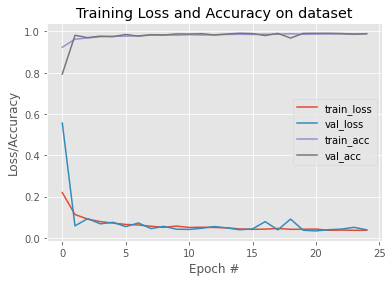

In [20]:
#  Visualization

# plot the training loss and accuracy
N = np.arange(0, 25)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, history.history["loss"], label="train_loss")
plt.plot(N, history.history["val_loss"], label="val_loss")
plt.plot(N, history.history["accuracy"], label="train_acc")
plt.plot(N, history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy on dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()
plt.savefig("train_plot")

## Part 4 - Making a single prediction

In [0]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

In [0]:
print(prediction)